In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Data Understanding
plays = pd.read_csv('..\\data\\game_plays.csv')
games = pd.read_csv('..\\data\\game.csv')
print('Plays Columns: ' ,plays.columns)
print('Games Columns: ' ,games.columns)


Plays Columns:  Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'description', 'st_x', 'st_y'],
      dtype='object')
Games Columns:  Index(['game_id', 'season', 'type', 'date_time_GMT', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
       'home_rink_side_start', 'venue', 'venue_link', 'venue_time_zone_id',
       'venue_time_zone_offset', 'venue_time_zone_tz'],
      dtype='object')


In [3]:
# Add additional informations per Play
plays_ext = pd.merge(plays, games[['game_id', 'season', 'type', 'away_team_id','home_team_id']], on=['game_id'], how='left')
print('Plays Columns: ' ,plays_ext.columns)

Plays Columns:  Index(['play_id', 'game_id', 'team_id_for', 'team_id_against', 'event',
       'secondaryType', 'x', 'y', 'period', 'periodType', 'periodTime',
       'periodTimeRemaining', 'dateTime', 'goals_away', 'goals_home',
       'description', 'st_x', 'st_y', 'season', 'type', 'away_team_id',
       'home_team_id'],
      dtype='object')


In [4]:
unique_events = plays_ext['event'].unique()
unique_events

array(['Game Scheduled', 'Period Ready', 'Period Start', 'Faceoff',
       'Shot', 'Goal', 'Takeaway', 'Hit', 'Stoppage', 'Blocked Shot',
       'Giveaway', 'Missed Shot', 'Penalty', 'Period End',
       'Period Official', 'Game End', 'Official Challenge',
       'Shootout Complete', 'Early Intermission Start',
       'Early Intermission End', 'Game Official', 'Emergency Goaltender'],
      dtype=object)

In [5]:
seasons = plays_ext['season'].unique()
seasons

array([20162017, 20172018, 20152016, 20142015, 20122013, 20132014,
       20112012, 20102011, 20082009, 20092010, 20072008, 20062007,
       20022003, 20032004, 20052006, 20002001, 20012002, 20192020,
       20182019], dtype=int64)

In [7]:
def plot_amount_event(data):
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title('Häufigkeit der Events')
    plt.xlabel('Event')
    plt.ylabel('Anzahl')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

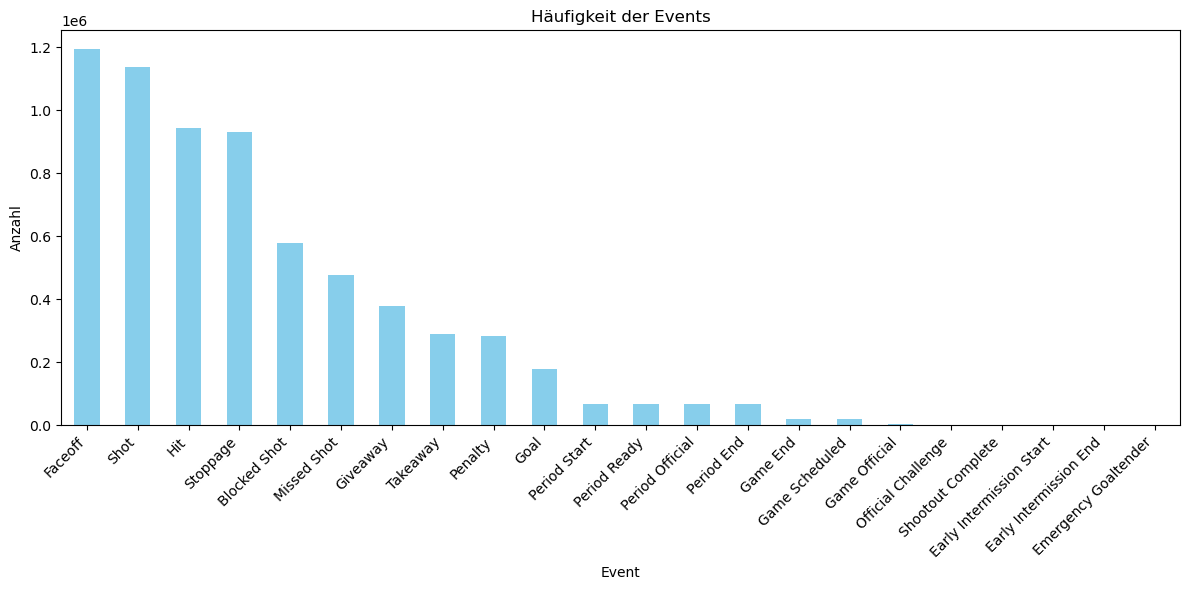

In [8]:
# Count the frequency of each event
event_counts = plays_ext['event'].value_counts()
plot_amount_event(event_counts)

In [9]:
# Split Events in dataframes 0> only get events that could be useful
# Get Shots
# exculde blocked shot => we do not know if the shot is going to miss the target, score or get stopped by the goaly
shots = plays_ext.loc[plays_ext['event'].isin(['Goal','Shot', 'Missed Shot'])]
print('Shots: ', len(shots))
#Get Hits
hits = plays_ext.loc[plays_ext['event'].isin(['Hit'])]
#Get Faceoffs => who faces offs against whom and who won the faceoff
faceoffs = plays_ext.loc[plays_ext['event'].isin(['Faceoff'])]
#Get Stoppage => not useful yet, its events like icing, offside
stoppages = plays_ext.loc[plays_ext['event'].isin(['Stoppage'])]
#Get Takeaways => puck gets taken by the opposite team
takeaways = plays_ext.loc[plays_ext['event'].isin(['Takeaway'])]
#Get Penalties
penalties = plays_ext.loc[plays_ext['event'].isin(['Penalty'])]

Shots:  1797912


In [10]:
faceoffs['description'].unique()

array(['Jonathan Toews faceoff won against Claude Giroux',
       'Pierre-Edouard Bellemare faceoff won against Nick Schmaltz',
       'Marcus Kruger faceoff won against Sean Couturier', ...,
       'Brayden Schenn faceoff won against Karson Kuhlman',
       'Oskar Sundqvist faceoff won against Brad Marchand',
       'Ivan Barbashev faceoff won against Brad Marchand'], dtype=object)

In [11]:
stoppages['description'].unique()

array(['Goalie Stopped', 'Icing', 'Offside', 'TV timeout',
       'Puck in Benches', 'Puck in Netting', 'Hand Pass', 'Home Timeout',
       'Puck in Crowd', 'High Stick', 'Puck Frozen',
       'Referee or Linesman', 'Player Equipment', 'Video Review',
       'Visitor Timeout', 'Official Injury',
       'Challenge Away: goalie interference', 'Net Off', 'Clock Problem',
       'Challenge Home: goalie interference', 'Challenge Away: off-side',
       'Player Injury', 'Ice Problem', 'Challenge Home: off-side',
       'Rink Repair', 'Premature Substitution', 'Objects on Ice',
       'Challenge League: off-side', 'Switch sides',
       'Goalie Puck Frozen Played Beyond Center Line',
       'Net Dislodged Offensive Skater', 'Net Dislodged by Goaltender',
       'Net Dislodged Defensive Skater', 'Skater Puck Frozen',
       'Missing key [ED_1717]', 'Missing key [ED_1718]',
       'Missing key [ED_1720]'], dtype=object)

In [12]:
penalties['secondaryType'].unique()

array(['Hooking', 'Closing hand on puck', 'Interference', 'Hi-sticking',
       'Roughing', 'Slashing', 'Holding', 'Tripping', 'Fighting',
       'Cross checking', 'Hi stick - double minor',
       'Too many men on the ice', 'Delaying Game - Puck over glass',
       'Boarding', 'Game misconduct', 'Instigator', 'Misconduct',
       'Interference - Goalkeeper', 'Kneeing',
       'PS - Tripping on breakaway', 'Delay of game', 'Holding the stick',
       'Illegal equipment', 'Unsportsmanlike conduct', 'Embellishment',
       'PS - Slash on breakaway', 'Broken stick',
       'PS - Hooking on breakaway', 'Delaying the game',
       'Instigator - Misconduct', 'Match penalty', 'Elbowing', 'Charging',
       'PS - Net displaced', 'Illegal stick',
       'Delaying Game - Illegal play by goalie', 'Illegal check to head',
       'Goalie leave crease', 'Minor', 'Bench', 'Face-off violation',
       'Delay Gm - Face-off Violation', 'Clipping', 'Abusive language',
       'Objects on ice', 'Illegal su

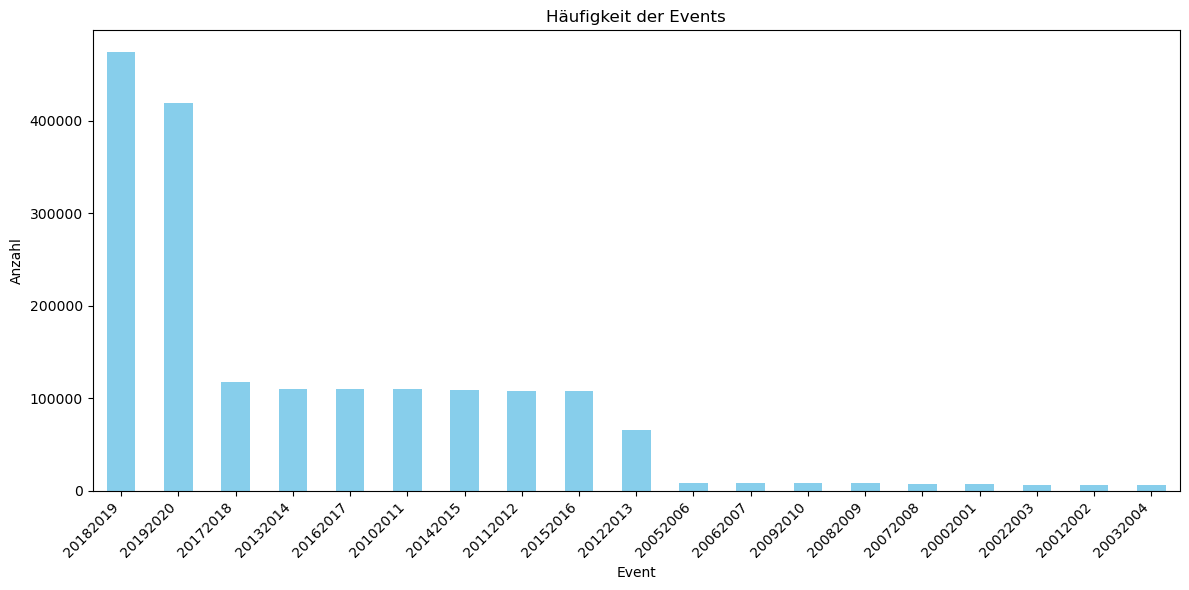

In [14]:
# Count the frequency of each event
shots_season = shots['season'].value_counts()
plot_amount_event(shots_season)

In [15]:
# seems that at season 2010-2011 and 2018-2019 there were significant more shots tracked than previously => why/ what changed?
shots_test = shots[shots['season'].isin([20102011])]
#display(shots_test)

shots_new = shots[shots['season'].isin([20192020])]
#display(shots_new)

# in newwer seasons an event is tracked multiple times => dropp duplicates
shots = shots.drop_duplicates(subset=['play_id'])

,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,...,dateTime,goals_away,goals_home,description,st_x,st_y,season,type,away_team_id,home_team_id
2180137,2010020918_12,2010020918,7.0,9.0,Missed Shot,NaN,77.0,37.0,1,REGULAR,...,2011-02-26 00:40:23,0,0,Tyler Ennis - Wide of Net,77.0,37.0,20102011,R,9,7
2180139,2010020918_14,2010020918,9.0,7.0,Shot,Wrist Shot,-58.0,-25.0,1,REGULAR,...,2011-02-26 00:41:43,0,0,Milan Michalek Wrist Shot saved by Ryan Miller,58.0,25.0,20102011,R,9,7
2180140,2010020918_15,2010020918,9.0,7.0,Missed Shot,NaN,-74.0,-4.0,1,REGULAR,...,2011-02-26 00:41:54,0,0,Milan Michalek - Wide of Net,74.0,4.0,20102011,R,9,7
2180141,2010020918_16,2010020918,9.0,7.0,Shot,Wrist Shot,-61.0,25.0,1,REGULAR,...,2011-02-26 00:42:14,0,0,Bobby Butler Wrist Shot saved by Ryan Miller,61.0,-25.0,20102011,R,9,7
2180143,2010020918_18,2010020918,7.0,9.0,Shot,Backhand,83.0,4.0,1,REGULAR,...,2011-02-26 00:43:31,0,0,Jason Pominville Backhand saved by Craig Anderson,83.0,4.0,20102011,R,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381918,2010030174_317,2010030174,27.0,17.0,Missed Shot,NaN,55.0,-3.0,3,REGULAR,...,2011-04-21 06:03:13,5,3,Kyle Turris - Wide of Net,55.0,-3.0,20102011,P,17,27
3381919,2010030174_318,2010030174,17.0,27.0,Missed Shot,NaN,-60.0,-12.0,3,REGULAR,...,2011-04-21 06:03:30,5,3,Todd Bertuzzi - Goalpost,60.0,12.0,20102011,P,17,27
3381925,2010030174_324,2010030174,17.0,27.0,Missed Shot,NaN,-47.0,25.0,3,REGULAR,...,2011-04-21 06:06:22,5,3,Pavel Datsyuk - Wide of Net,47.0,-25.0,20102011,P,17,27
3381926,2010030174_325,2010030174,27.0,17.0,Shot,Slap Shot,15.0,-16.0,3,REGULAR,...,2011-04-21 06:06:30,5,3,Keith Yandle Slap Shot saved by Jimmy Howard,15.0,-16.0,20102011,P,17,27


,play_id,game_id,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,...,dateTime,goals_away,goals_home,description,st_x,st_y,season,type,away_team_id,home_team_id
3381945,2019020001_5,2019020001,9.0,10.0,Goal,Tip-In,85.0,-1.0,1,REGULAR,...,2019-10-03 00:15:32,1,0,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",85.0,-1.0,20192020,R,9,10
3381946,2019020001_5,2019020001,9.0,10.0,Goal,Tip-In,85.0,-1.0,1,REGULAR,...,2019-10-03 00:15:32,1,0,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",85.0,-1.0,20192020,R,9,10
3381949,2019020001_7,2019020001,9.0,10.0,Missed Shot,NaN,28.0,-37.0,1,REGULAR,...,2019-10-03 00:16:31,1,0,Nikita Zaitsev Wide of Net,28.0,-37.0,20192020,R,9,10
3381950,2019020001_7,2019020001,9.0,10.0,Missed Shot,NaN,28.0,-37.0,1,REGULAR,...,2019-10-03 00:16:31,1,0,Nikita Zaitsev Wide of Net,28.0,-37.0,20192020,R,9,10
3381961,2019020001_13,2019020001,10.0,9.0,Shot,Snap Shot,-32.0,-2.0,1,REGULAR,...,2019-10-03 00:18:23,1,0,Morgan Rielly Snap Shot saved by Craig Anderson,32.0,2.0,20192020,R,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941486,2019030416_343,2019030416,25.0,14.0,Missed Shot,NaN,84.0,7.0,3,REGULAR,...,2020-09-29 03:48:56,2,0,Tyler Seguin Wide of Net,84.0,7.0,20192020,P,14,25
4941487,2019030416_344,2019030416,25.0,14.0,Shot,Wrist Shot,77.0,0.0,3,REGULAR,...,2020-09-29 03:49:05,2,0,Joe Pavelski Wrist Shot saved by Andrei Vasile...,77.0,0.0,20192020,P,14,25
4941488,2019030416_344,2019030416,25.0,14.0,Shot,Wrist Shot,77.0,0.0,3,REGULAR,...,2020-09-29 03:49:05,2,0,Joe Pavelski Wrist Shot saved by Andrei Vasile...,77.0,0.0,20192020,P,14,25
4941489,2019030416_345,2019030416,25.0,14.0,Missed Shot,NaN,71.0,11.0,3,REGULAR,...,2020-09-29 03:49:10,2,0,Tyler Seguin Wide of Net,71.0,11.0,20192020,P,14,25


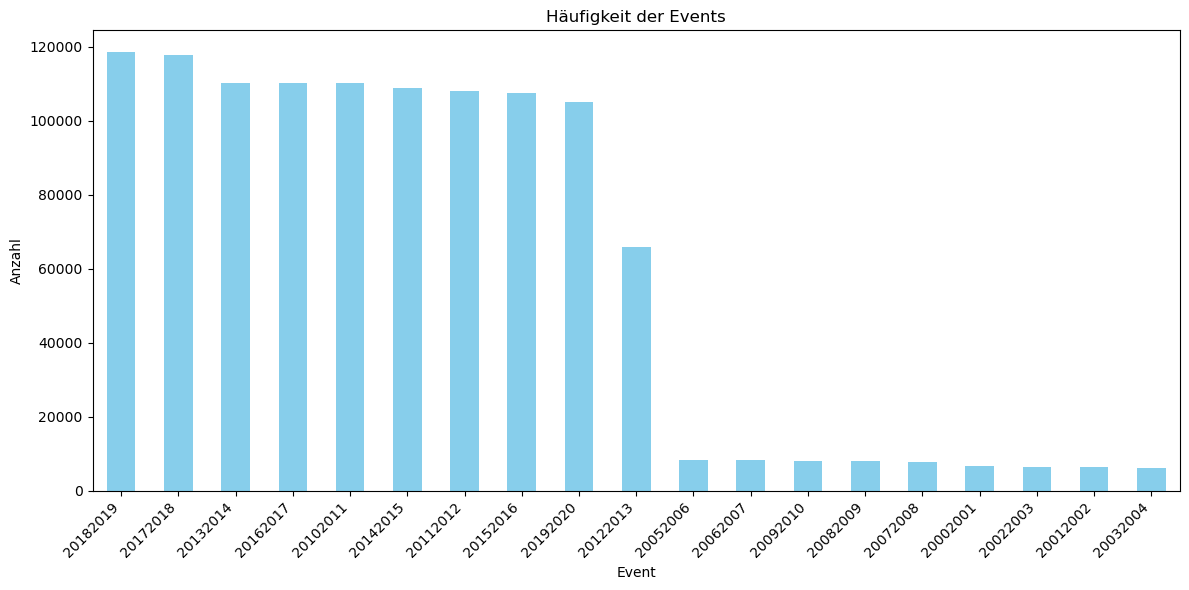

In [16]:
shots_season = shots['season'].value_counts()
plot_amount_event(shots_season)

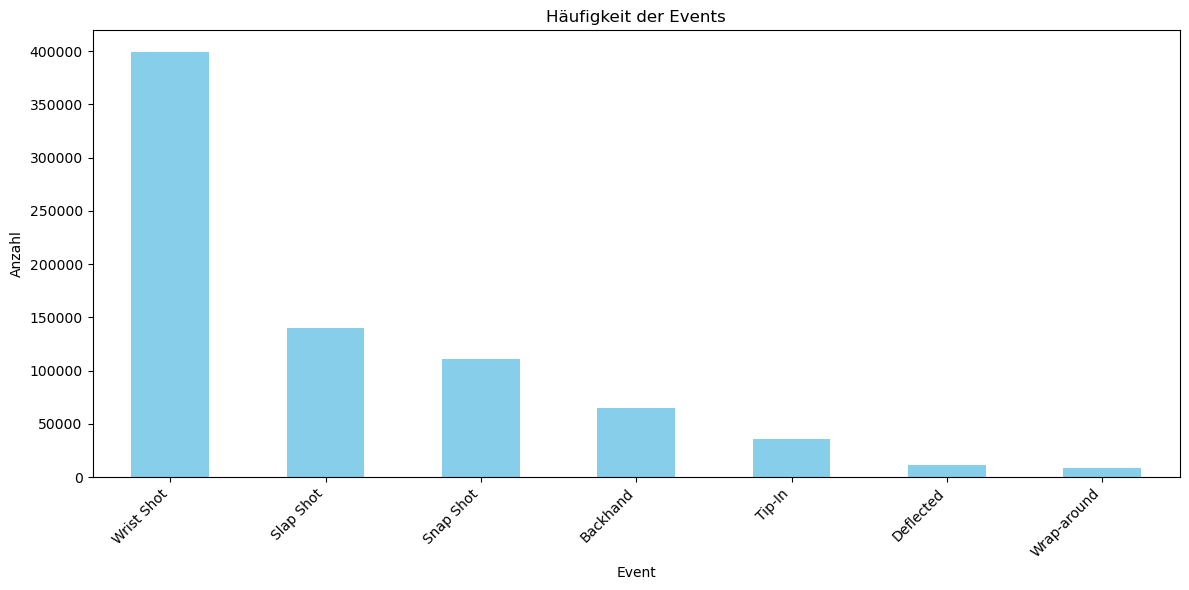

In [17]:
# Count the frequency of each shot type
shot_types = shots['secondaryType'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
shot_types.plot(kind='bar', color='skyblue')
plt.title('Häufigkeit der Events')
plt.xlabel('Event')
plt.ylabel('Anzahl')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()